In [ ]:
from torchvision import datasets as dt
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim

# **Q3:**

## Dataset

In [ ]:
# load the training data
mnist = dt.MNIST('data', train=True, download=True)
mnist = list(mnist)[:2500]

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



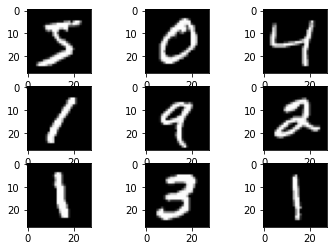

In [ ]:
# plot the first 12 images in the training data
import matplotlib.pyplot as plt
for k, (image, label) in enumerate(mnist[:9]):
  plt.subplot(3, 3, k+1)
  plt.imshow(image, cmap='gray')

In [ ]:
# transform the image data type to tensor
img_to_tensor = transforms.ToTensor()

In [ ]:
# convert the last image we saw into a tensor
img_tensor = img_to_tensor(image)
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# load the training data as tensor
mnist_train = dt.MNIST('data', train=True, transform=img_to_tensor)
mnist_train = list(mnist_train)[:2500]

In [ ]:
#split data into training and validation
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

## Linear Model in PyTorch

In [ ]:
# assume 50 features, 1 linear output
simple_model = nn.Linear(50, 1)

In [ ]:
weight, bias = list(simple_model.parameters())

In [ ]:
# By default, PyTorch initializes these values to a random number close to 0
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[-0.0130,  0.1044,  0.0261, -0.1246,  0.1350, -0.0767, -0.0513,  0.0297,
         -0.0920,  0.0061,  0.0978, -0.1065,  0.0404,  0.0172,  0.1124, -0.0805,
          0.0226,  0.0370, -0.1067,  0.1044,  0.0477,  0.0772,  0.0365, -0.0945,
         -0.0847, -0.0970,  0.1297, -0.0688, -0.0636,  0.0874, -0.1250,  0.0284,
         -0.0870,  0.0010,  0.0893,  0.0817, -0.0935, -0.1377, -0.0249,  0.0148,
         -0.0430, -0.0076, -0.1115, -0.0180, -0.0578,  0.0070, -0.0556, -0.1354,
          0.0576, -0.1393]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([0.0861], requires_grad=True)
torch.Size([1])


<font color='red'>Like the example above, create the model to solve the MNIST digitclassification problem.</font>

In [ ]:
'''
############
# Your code
# Start


# End
'''

simple_model = nn.Linear(28*28, 10)

## Prediction

In [ ]:
def run_gradient_descent(model,batch_size=64,learning_rate=0.01,weight_decay=0,num_epochs=10):
  #define the best optimizer and loss function
  '''
  ############
  # Your code
  # Start


  # End
  '''

  criterion = nn.CrossEntropyLoss()
  optimzer = optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


  iters, losses = [], []
  iters_sub, train_acc, val_acc = [], [] ,[]




  # PyTorch data loader
  train_loader = torch.utils.data.DataLoader(
      mnist_train,
      batch_size=batch_size, # batch size
      shuffle=True) # shuffle before each epoch


  # training
  for epoch in range(num_epochs):

    '''
    ############
    # Your code
    # Start


    # End

    '''

    for data in train_loader:

      x, y = data
      output = model(x.view(-1, 28*28))
      loss = criterion(output, y)

      loss.backward()
      optimizer.step()

      optimizer.zero_grad()


    iters.append(epoch)
    iters_sub.append(epoch)
    losses.append(loss.item())
    val_acc.append(get_accuracy(model,mnist_val))
    train_acc.append(get_accuracy(model,mnist_train))


  # plotting
  plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
  plt.plot(iters_sub, train_acc, label="Train")
  plt.plot(iters_sub, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()

def get_accuracy(model, data):
  loader = torch.utils.data.DataLoader(data, batch_size=500)

  correct, total = 0, 0
  for xs, ts in loader:
      xs = xs.view(-1, 784) # flatten the image
      zs = model(xs)
      pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(ts.view_as(pred)).sum().item()
      total += int(ts.shape[0])
      return correct / total

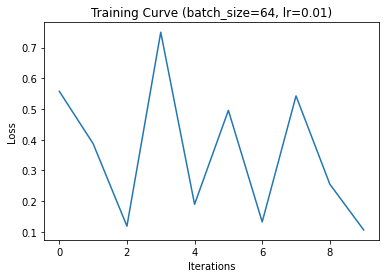

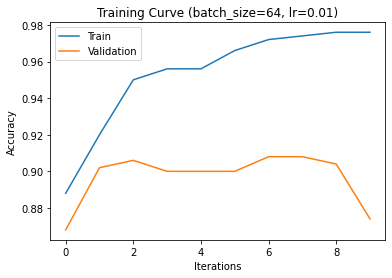

In [ ]:
model = simple_model #creat the model
run_gradient_descent(model, batch_size=64, learning_rate=0.01, num_epochs=10)

<font color='red'>plot model weight for each classes</font>

weight shape : (784, 10)

bias shape : (1, 10)

torch.Size([10, 784])


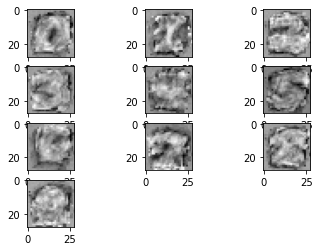

In [ ]:
print(model.weight.shape)

import matplotlib.pyplot as plt
for k in range(10):
  plt.subplot(4, 3, k+1)
  plt.imshow(model.weight[k].detach().numpy().reshape((28, 28)), cmap='gray')

# **Q4:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error ,mean_absolute_error
import torch
import warnings
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/DLAssignments/01/ETA.csv')
print(df)

      speed   distance   traffic  weather_conditions  Time_Arrival
0        66  12.771260  0.560419           14.779715      1.924207
1        39  27.367505  0.976736           12.747367      3.452725
2        49  32.019847  0.500763           14.674715      2.540334
3        71  19.206991  0.495962           12.568860      1.936440
4        86  16.915650  0.400313            4.881152      1.668813
...     ...        ...       ...                 ...           ...
1995     66   5.448461  0.163898            7.544795      1.071012
1996     31  35.616019  0.979695           19.123463      4.145438
1997     82  28.095359  0.632550           19.845278      2.273836
1998     88  39.216023  0.119923            5.500460      1.566746
1999     89  26.030452  0.815566            5.129986      2.545009

[2000 rows x 5 columns]


# ب:

In [ ]:
# 1-difine X & Y then splite train and test
# 2-defin linear regression moudel
# 3-perdict y_pred
# 4-print MSE & MAE
#############################
      #input your code
#############################

from torchvision import datasets as dt
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils
from sklearn.metrics import mean_squared_error, mean_absolute_error


df['DPS'] = df['distance']/df['speed']
del df["distance"]
del df["speed"]

y= df['Time_Arrival']
x = df.loc[:, df.columns != 'Time_Arrival']

x_train = x.iloc[:1500]
y_train = y.iloc[:1500]

x_test = x.iloc[1500:]
y_test = y.iloc[1500:]

reg = LinearRegression().fit(x_train, y_train)
res = reg.predict(np.array( x_test ))

print("errors from linear regression model")
mae = mean_absolute_error(res, y_test.values)
mse = mean_squared_error(res, y_test.values)
print("mae => " + str(mae))
print("mse => " + str(mse))


# x_train['b']=1
# X = x_train.to_numpy()
# Xt = np.transpose(X)
# Y = y_train.to_numpy()



# W = np.matmul(
#         np.matmul(
#             np.linalg.inv(np.matmul(Xt, X)),
#             Xt
#         ),
#         Y
#     )

# b = W[-1]
# W = W[:-1]
# res2 = np.matmul(np.array( x_test ),W)+b
# print(res[2])
# print(res2[2])

errors from linear regression model
mae => 6.250555628639631e-16
mse => 6.340716044746764e-31


In [ ]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
step_size = 0.006  #  for optimiser GD
epoch = 3500

In [ ]:
# 1-difine X & Y
# 2-defin forward & loss function
# 3-write train loop
# 4-print MSE & MAE
# 5-plot loss
#############################
      #input your code
#############################

import matplotlib.pyplot as plt
simple_model = nn.Linear(3,1)
cross_el = nn.CrossEntropyLoss()
mse_el = nn.MSELoss()
optimizer = torch.optim.Adam(simple_model.parameters(), lr=0.001)

train_target = torch.tensor(y_train.values.astype(np.float32))
train = torch.tensor(x_train.values.astype(np.float32))
train_tensor = data_utils.TensorDataset(train, train_target)
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = 1, shuffle = True)

for epoch in range(20):
      simple_model.train()
      for batch, (X, y) in enumerate(train_loader):
          optimizer.zero_grad()
          output = simple_model(X)
          loss = mse_el(output,y)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()


test_target = torch.tensor(y_test.values.astype(np.float32))
test = torch.tensor(x_test.values.astype(np.float32))
test_tensor = data_utils.TensorDataset(test, test_target)
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = 1, shuffle = False)
_res = []
with torch.no_grad():
    simple_model.eval()
    for X, y in test_loader:
        pred = simple_model(X)
        _res.append(pred.numpy()[0][0])

_res = np.array(_res)
print("errors from pytourch network")
mae = mean_absolute_error(_res, y_test.values)
mse = mean_squared_error(_res, y_test.values)
print("mae => " + str(mae))
print("mse => " + str(mse))

errors from pytourch network
mae => 1.1229733645845563e-07
mse => 2.1848290811373826e-14


# ج:

In [ ]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
step_size = 0.006  #  for optimiser GD
epoch = 3500

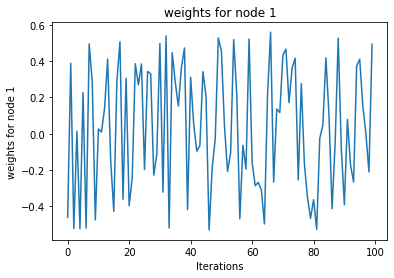

mean for node 1 0.0317542427679291
var for node 1  0.11414552197184388


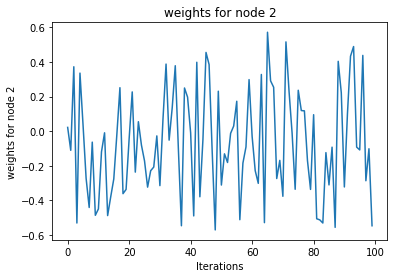

mean for node 2 -0.07014253376983107
var for node 2 0.09081570817696337


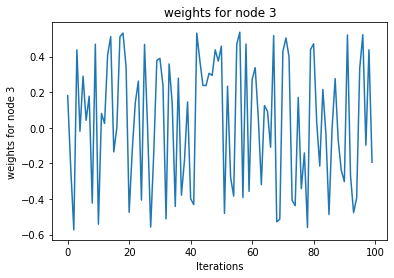

mean for node 3 0.039108537102583794
var for node 3 0.12679625452595242


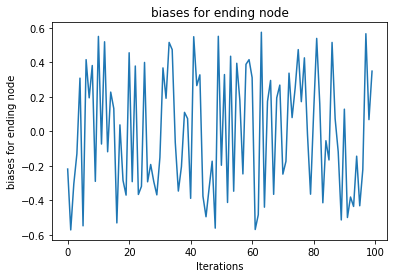

mean biases for ending node -0.0025019353441894055
var biases for ending node 0.122776352279581


In [ ]:
# 1-difine X & Y
# 2-define subset of data
# 3-write train loop
# 4-plot & analysis w0,w1,w2,b,loss
#############################
      #input your code
#############################


weights = []
biases = []
count = 100
for x in range(count):
  # iters.append(x+1)
  simple_model = nn.Linear(3,1)
  train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = 1, shuffle = True)
  for epoch in range(5):
      simple_model.train()
      for batch, (X, y) in enumerate(train_loader):
          if batch > 300: break
          optimizer.zero_grad()
          output = simple_model(X)
          loss = mse_el(output,y)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

  w,b = simple_model.parameters()
  # W.append(w[0].cpu().detach().numpy().tolist())
  # B.append(b[0].cpu().detach().numpy().tolist())
  # WM.append(w[0].cpu().detach().numpy().mean())
  # BM.append(b[0].cpu().detach().numpy().mean())
  # WV.append(w[0].cpu().detach().numpy().var())
  # BV.append(b[0].cpu().detach().numpy().var())
  weights.append(w[0].cpu().detach().numpy().tolist())
  biases.append(b[0].cpu().detach().numpy().tolist())


iters = []
tmp = []
for x in range(count):
  # print(iters)
  iters.append(x)
  tmp.append(weights[x][0])
plt.title("weights for node 1")
plt.plot(iters, tmp, label="step")
plt.xlabel("Iterations")
plt.ylabel("weights for node 1")
plt.show()
print("mean for node 1 " + str(np.array(tmp).mean()))
print("var for node 1  " + str(np.array(tmp).var()))


iters = []
tmp = []
for x in range(count):
  # print(iters)
  iters.append(x)
  tmp.append(weights[x][1])
plt.title("weights for node 2")
plt.plot(iters, tmp, label="step")
plt.xlabel("Iterations")
plt.ylabel("weights for node 2")
plt.show()
print("mean for node 2 " + str(np.array(tmp).mean()))
print("var for node 2 " + str(np.array(tmp).var()))



iters = []
tmp = []
for x in range(count):
  # print(iters)
  iters.append(x)
  tmp.append(weights[x][2])
plt.title("weights for node 3")
plt.plot(iters, tmp, label="step")
plt.xlabel("Iterations")
plt.ylabel("weights for node 3")
plt.show()
print("mean for node 3 " + str(np.array(tmp).mean()))
print("var for node 3 " + str(np.array(tmp).var()))

iters = []
tmp = []
for x in range(count):
  # print(iters)
  iters.append(x)
  tmp.append(biases[x])
plt.title("biases for ending node")
plt.plot(iters, tmp, label="step")
plt.xlabel("Iterations")
plt.ylabel("biases for ending node")
plt.show()
print("mean biases for ending node " + str(np.array(tmp).mean()))
print("var biases for ending node " + str(np.array(tmp).var()))




# Q5

Write all the parts yourself

# ت:

In [ ]:
from sklearn.linear_model import LogisticRegression
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/DLAssignments/01/heart_disease.csv')
y= df['TenYearCHD']
x = df.loc[:, df.columns != 'TenYearCHD']
x.fillna(x.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
#x = x.fillna(0)
#y = y.fillna(0)
x_train = x.iloc[:4000]
y_train = y.iloc[:4000]
x_test = x.iloc[4000:]
y_test = y.iloc[4000:]
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
r = logisticRegr.score(x_test, y_test)
print(predictions)
print(y_test)
print(r)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
4000    0
4001    0
4002    0
4003    0
4004    0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 238, dtype: int64
0.8361344537815126
